In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('recent_10_years_data.csv')
data.head()

,title,president,publication_date,signing_date,citation,document_number,executive_order_number,pdf_url,toc_subject,disposition_notes,cleaned_text
0,Combating Emerging Firearms Threats and Improv...,Joseph R. Biden Jr.,2024-10-02,2024-09-26,89 FR 80345,2024-22938,14127,https://www.govinfo.gov/content/pkg/FR-2024-10...,Unspecified,NaN,Executive Order 14127--Combating Emerging Fire...
1,Investing in America and Investing in American...,Joseph R. Biden Jr.,2024-09-11,2024-09-06,89 FR 73559,2024-20712,14126,https://www.govinfo.gov/content/pkg/FR-2024-09...,Federal Government,"See: EO 11246, September 24, 1965; EO 13985, J...","Executive Order 14126 of September 6, 2024 ..."
2,Establishing an Emergency Board To Investigate...,Joseph R. Biden Jr.,2024-07-29,2024-07-24,89 FR 60791,2024-16740,14125,https://www.govinfo.gov/content/pkg/FR-2024-07...,Committees; Establishment,NaN,"Executive Order 14125 of July 24, 2024 ..."
3,White House Initiative on Advancing Educationa...,Joseph R. Biden Jr.,2024-07-22,2024-07-17,89 FR 59585,2024-16225,14124,https://www.govinfo.gov/content/pkg/FR-2024-07...,Education,"See: EO 14045, September 13, 2021",Executive Order 14124--White House Initiative ...
4,White House Council on Supply Chain Resilience,Joseph R. Biden Jr.,2024-06-21,2024-06-14,89 FR 51949,2024-13810,14123,https://www.govinfo.gov/content/pkg/FR-2024-06...,Committees; Establishment,"See: EO 14017, February 24, 2021\r\nSupersedes...","Executive Order 14123 of June 14, 2024 ..."


In [5]:
# convert 'publication_date' and 'signing_date' to datetime format
data['publication_date'] = pd.to_datetime(data['publication_date'], errors='coerce')
data['signing_date'] = pd.to_datetime(data['signing_date'], errors='coerce')

### Trend Analysis Between Presidents

In [ ]:
import string
import re
import matplotlib.pyplot as plt
# For TextBlob sentiment analysis
from textblob import TextBlob
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


#### 1. Number of Executive Orders by President

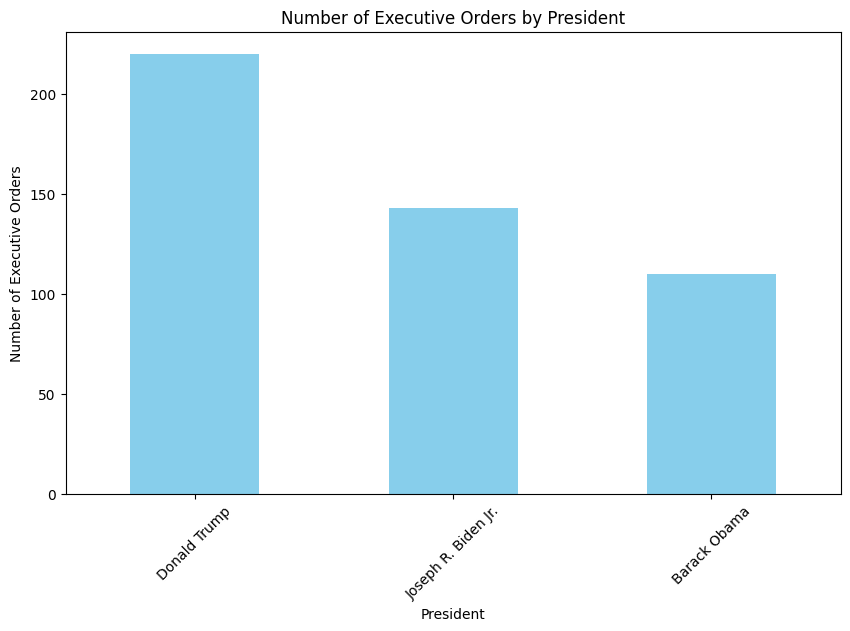

In [ ]:
# Count the number of executive orders by president
president_counts = data['president'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
president_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Executive Orders by President')
plt.xlabel('President')
plt.ylabel('Number of Executive Orders')
plt.xticks(rotation=45)
plt.show()

interpretation

#### 2. Executive Order Length Comparison

In [ ]:
# Analyze the length of the executive order texts
data['text_length'] = data['cleaned_text'].apply(lambda x: len(x) if pd.notnull(x) else 0)

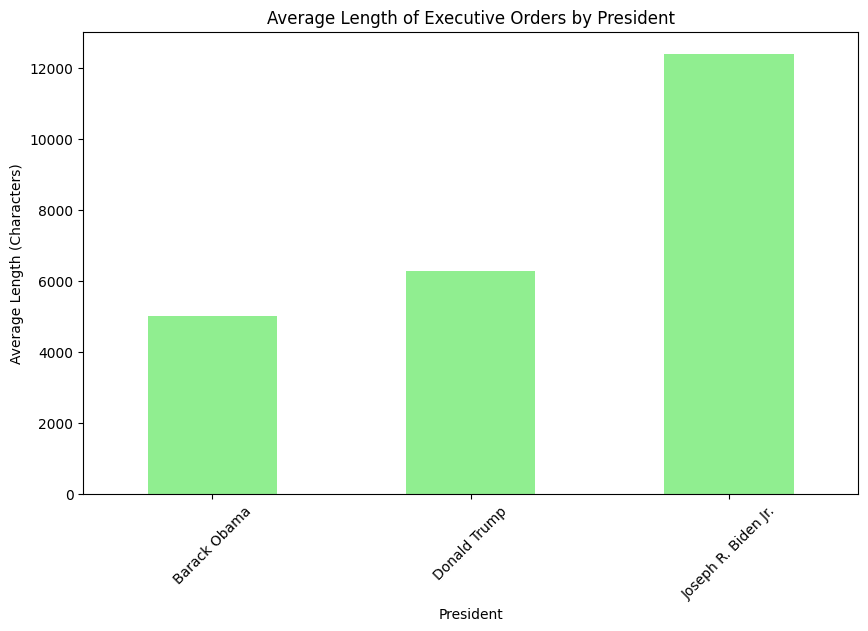

In [ ]:
# Group by president and calculate average text length
average_length = data.groupby('president')['text_length'].mean()

# Plotting
plt.figure(figsize=(10, 6))
average_length.plot(kind='bar', color='lightgreen')
plt.title('Average Length of Executive Orders by President')
plt.xlabel('President')
plt.ylabel('Average Length (Characters)')
plt.xticks(rotation=45)
plt.show()

#### 3. Time Series of Executive Orders

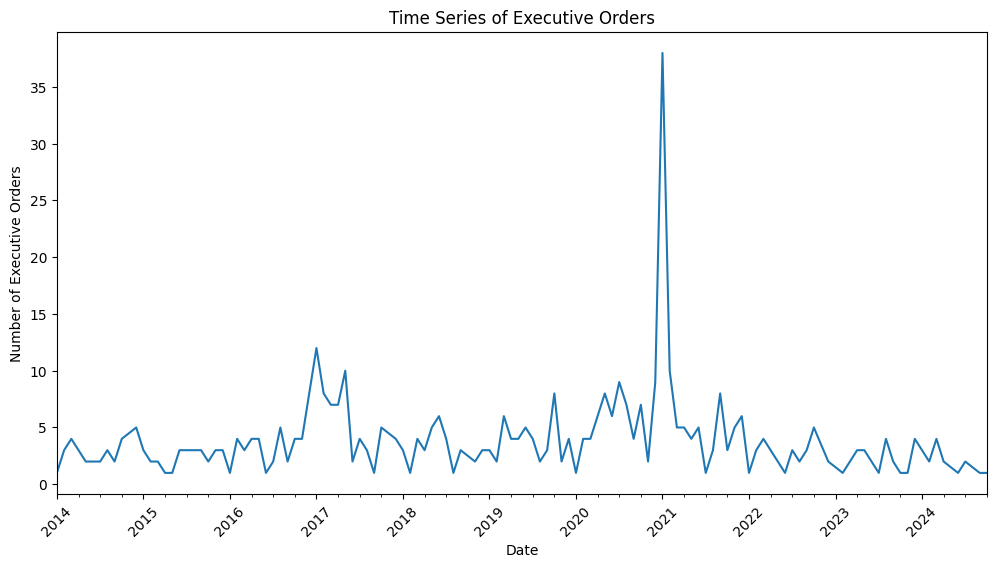

In [8]:
# Create a new DataFrame for time series
time_series = data.groupby(data['publication_date'].dt.to_period('M')).size()

# Plotting
plt.figure(figsize=(12, 6))
time_series.plot()
plt.title('Time Series of Executive Orders')
plt.xlabel('Date')
plt.ylabel('Number of Executive Orders')
plt.xticks(rotation=45)
plt.show()